# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T05:53:53.874908+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

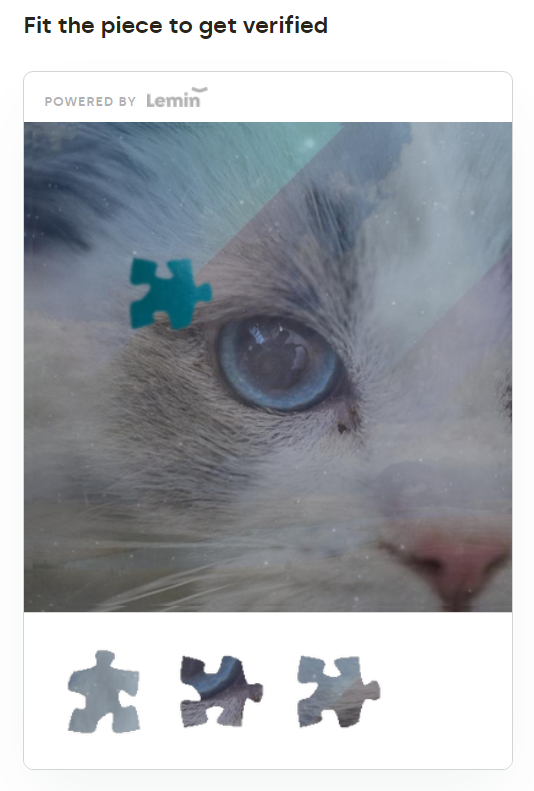

## Objective Identification

In [ ]:
def stage1(frames):
    describe(frame_id=0, description="A blank verification screen with the instruction 'Fit the piece to get verified'.")
    describe(frame_id=1, description="An image of a cat with a missing puzzle piece and three puzzle piece options below.")

    relate(frame_id1=0, frame_id2=1, relationship="Frame 0 provides the task instruction, while Frame 1 presents the puzzle to solve.")

    objective(description="To solve the task, drag the correct puzzle piece from the options to fit into the missing space in the image, ensuring it matches the shape and pattern.")

## Structure Abstraction

In [ ]:
def stage2(frames):
    # Frame 0: Instruction frame, no interactables
    frame_0 = frames[0]
    frame_0.set_frame_as("POINTABLE")  # Instructional frame, no direct interaction

    # Frame 1: Puzzle frame
    frame_1 = frames[1]

    # Identify the puzzle piece options
    puzzle_piece_1 = frame_1.get_element(position="down", details="leftmost puzzle piece")
    puzzle_piece_2 = frame_1.get_element(position="down", details="middle puzzle piece")
    puzzle_piece_3 = frame_1.get_element(position="down", details="rightmost puzzle piece")

    # Mark the puzzle pieces as DRAGGABLE
    puzzle_piece_1.set_element_as("DRAGGABLE")
    puzzle_piece_2.set_element_as("DRAGGABLE")
    puzzle_piece_3.set_element_as("DRAGGABLE")

## Solution Composition

In [ ]:
def stage3(frames):
    # Step 1: Annotate the missing slot in the fox image with keypoints
    keypoint_image = frames[1].show_keypoints(region="all")

    # Step 2: Ask the user to identify the general area of the missing slot
    missing_slot_id = ask([keypoint_image], "Where is the puzzle slot in the image?", answer_type="int")[0]
    missing_slot = frames[1].get_keypoint(id=missing_slot_id)

    # Step 3: Narrow down the search space using the neighbors of the identified keypoint
    neighbour_image = missing_slot.show_neighbours()
    refined_slot_id = ask([neighbour_image], "Refine the puzzle slot location.", answer_type="int")[0]
    refined_slot = missing_slot.get_neighbour(id=refined_slot_id)

    # Step 4: Drag the correct puzzle piece to the refined missing slot
    # Preview the draggable options
    drag_choices = []
    for i in range(3):
        piece = frames[1].get_interactable(i)
        drag_choices.extend(drag(start=piece, end=refined_slot))

    # Rank the draggable options to find the best match
    best_match_id = rank([choice.preview for choice in drag_choices], "Puzzle is fully in the missing spot")[0]

    # Drag and drop the best match
    drag_choices[best_match_id].drop()

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: Where is the puzzle slot in the image?
Output a list of numbers for each image.
You should follow the format `answer(numbers=[1, 2, ...])` to answer the question.

'''

Image 0
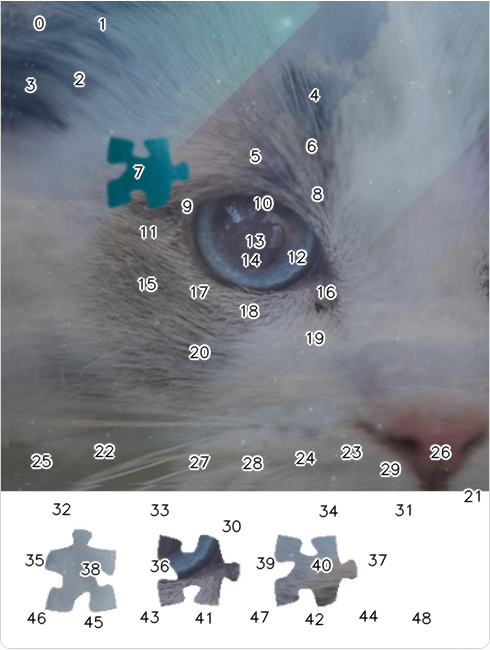

In [ ]:
IMAGES = 1

In [ ]:
RESPONSE = '''
answer(numbers=[7])
'''
TIME = 1.3624795251525939
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 648
PROMPT_TOKENS = 642
COMPLETION_TOKENS = 6

---

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: Refine the puzzle slot location.
Output a list of numbers for each image.
You should follow the format `answer(numbers=[1, 2, ...])` to answer the question.

'''

Image 0
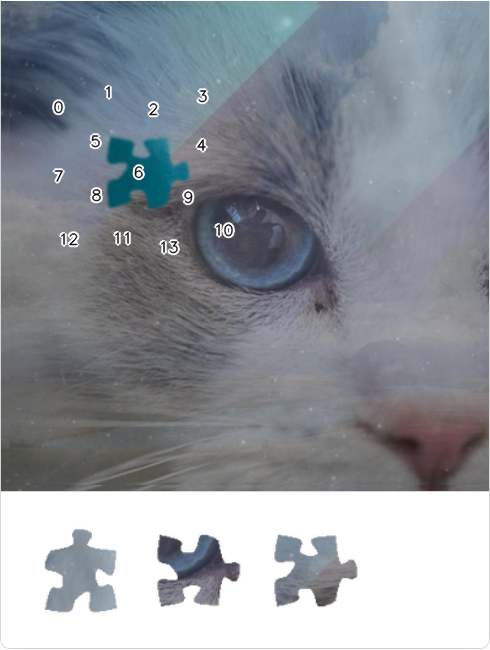

In [ ]:
IMAGES = 1

In [ ]:
RESPONSE = '''
answer(numbers=[6])
'''
TIME = 1.3967900583520532
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 491
PROMPT_TOKENS = 486
COMPLETION_TOKENS = 5

---

In [ ]:
PROMPT = '''
Given a list of images, rank them based on their relevance to the objective: Puzzle is fully in the missing spot.
You should follow the format rank(ids=[1, 2, ...]) to output a ranked list of image ids.
## Guidelines
1. Puzzle piece must fit perfectly on top of slot.
2. Shapes align properly: Geometric patterns should connect smoothly without distortion.
3. Consistent colors and shading: No abrupt color shifts or breaks between parts.
4. No fragmentation: Image should appear cohesive without misaligned pieces.
'''

Image 0 Image 1 Image 2 Image 3 Image 4 Image 5 Image 6 Image 7 Image 8 Image 9
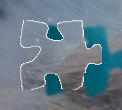
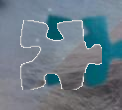
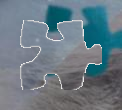
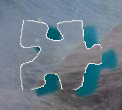
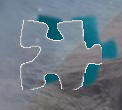
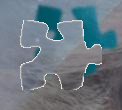
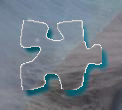
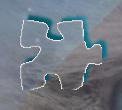
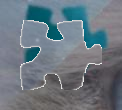
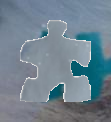

In [ ]:
IMAGES = 10

In [ ]:
RESPONSE = '''
rank(ids=[6, 3, 1, 4, 0, 7, 2, 5, 8, 9])
'''
TIME = 3.1346102240495384
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 2508
PROMPT_TOKENS = 2475
COMPLETION_TOKENS = 33

---

In [ ]:
PROMPT = '''
Given a list of images, rank them based on their relevance to the objective: Puzzle is fully in the missing spot.
You should follow the format rank(ids=[1, 2, ...]) to output a ranked list of image ids.
## Guidelines
1. Puzzle piece must fit perfectly on top of slot.
2. Shapes align properly: Geometric patterns should connect smoothly without distortion.
3. Consistent colors and shading: No abrupt color shifts or breaks between parts.
4. No fragmentation: Image should appear cohesive without misaligned pieces.
'''

Image 0 Image 1 Image 2 Image 3 Image 4 Image 5 Image 6 Image 7 Image 8 Image 9
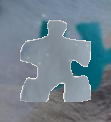
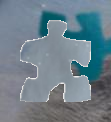
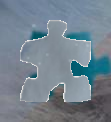
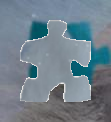
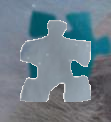
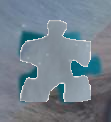
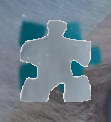
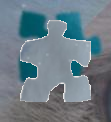
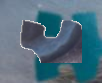
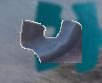

In [ ]:
IMAGES = 10

In [ ]:
RESPONSE = '''
rank(ids=[5, 6, 3, 2, 4, 1, 0, 7, 8, 9])
'''
TIME = 3.2329025203362107
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 2508
PROMPT_TOKENS = 2475
COMPLETION_TOKENS = 33

---

In [ ]:
PROMPT = '''
Given a list of images, rank them based on their relevance to the objective: Puzzle is fully in the missing spot.
You should follow the format rank(ids=[1, 2, ...]) to output a ranked list of image ids.
## Guidelines
1. Puzzle piece must fit perfectly on top of slot.
2. Shapes align properly: Geometric patterns should connect smoothly without distortion.
3. Consistent colors and shading: No abrupt color shifts or breaks between parts.
4. No fragmentation: Image should appear cohesive without misaligned pieces.
'''

Image 0 Image 1 Image 2 Image 3 Image 4 Image 5 Image 6
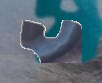
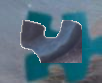
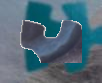
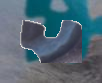
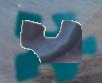
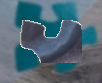
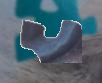

In [ ]:
IMAGES = 7

In [ ]:
RESPONSE = '''
rank(ids=[1, 3, 6, 2, 5, 4, 0])
'''
TIME = 3.1805945769883692
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 1860
PROMPT_TOKENS = 1836
COMPLETION_TOKENS = 24

---

In [ ]:
PROMPT = '''
Given a list of images, rank them based on their relevance to the objective: Puzzle is fully in the missing spot.
You should follow the format rank(ids=[1, 2, ...]) to output a ranked list of image ids.
## Guidelines
1. Puzzle piece must fit perfectly on top of slot.
2. Shapes align properly: Geometric patterns should connect smoothly without distortion.
3. Consistent colors and shading: No abrupt color shifts or breaks between parts.
4. No fragmentation: Image should appear cohesive without misaligned pieces.
'''

Image 0 Image 1 Image 2
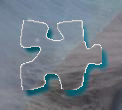
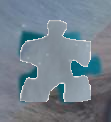
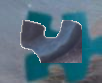

In [ ]:
IMAGES = 3

In [ ]:
RESPONSE = '''
rank(ids=[0, 1, 2])
'''
TIME = 1.6809042682871222
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 996
PROMPT_TOKENS = 984
COMPLETION_TOKENS = 12

---